# Создание

## Query фильтрация

In [ ]:
#Pandas Query Pandas Query is the other way to filter data, 
#the one that you don't usually use but you might want to consider.
#We will run through 3 examples:
#Simple filter for a column Filtering columns based off of each other 
#Using an environment variable to filter First, let's create our DataFrame

import pandas as pd
import numpy as np
np.random.seed(seed=42)



In [ ]:
df = pd.DataFrame.from_dict({"Name": ['Liho Liho', 'Tompkins', 'The Square', 'Chambers'],
                             "Mon": np.random.randint(10,200, size=(1,4))[0],
                             "Tues": np.random.randint(12,200, size=(1,4))[0],
                             "Wed": np.random.randint(12,200, size=(1,4))[0],
                             "Thurs": np.random.randint(12,200, size=(1,4))[0]}, orient='columns')
df

,Name,Mon,Tues,Wed,Thurs
0,Liho Liho,112,118,133,111
1,Tompkins,189,83,86,115
2,The Square,102,32,99,163
3,Chambers,24,114,128,142


In [ ]:
df.query('Mon > 90')


,Name,Mon,Tues,Wed,Thurs
0,Liho Liho,112,118,133,111
1,Tompkins,189,83,86,115
2,The Square,102,32,99,163



1. Simple filter for a column
To query (filter) your data, all you need to do is pass a string with a conditional expression. This is super similar to writing a forumla in an excel cell.

Notice here I'm querying my data for the rows where the "Mon" column is greater then the 90. There are only two rows that satisfy this filter, and they are returned.

Notice that all the other rows which don't satisfies this query are not returned
2. Filtering columns based off of each other
You can also filter two columns based off of each other. In this case I'm querying for data where the Monday column is greater than the Tuesday column.

In [ ]:
df.query('Mon > Tues')

,Name,Mon,Tues,Wed,Thurs
1,Tompkins,189,83,86,115
2,The Square,102,32,99,163


You can also achieve this result via the traditional filtering method.

In [ ]:
filter_1 = df['Mon'] > df['Tues']
df[filter_1]

,Name,Mon,Tues,Wed,Thurs
1,Tompkins,189,83,86,115
2,The Square,102,32,99,163


3. Using an environment variable to filter
If needed you can also use an environment variable to filter your data. Make sure to put an "@" sign in front of your variable within the string.

In [ ]:
dinner_limit=120
df.query('Thurs > @dinner_limit')

,Name,Mon,Tues,Wed,Thurs
2,The Square,102,32,99,163
3,Chambers,24,114,128,142


## From_dict

In [7]:
import pandas as pd

dict_data_column_keys = {
     "Name": ["Liho Liho", "500 Club", "Foreign Cinema", "The Square"],
     "Type": ["Restaurant", "Bar", "Restaurant", "Bar"],
     "AvgBill": [200.45, 34.64, 180.45, 45.54] 
    }

In [8]:
pd.DataFrame.from_dict(dict_data_column_keys)

,Name,Type,AvgBill
0,Liho Liho,Restaurant,200.45
1,500 Club,Bar,34.64
2,Foreign Cinema,Restaurant,180.45
3,The Square,Bar,45.54


In [9]:
# the same такой же результат, значение словаря - колонка
pd.DataFrame.from_dict(dict_data_column_keys, orient='columns')

,Name,Type,AvgBill
0,Liho Liho,Restaurant,200.45
1,500 Club,Bar,34.64
2,Foreign Cinema,Restaurant,180.45
3,The Square,Bar,45.54


In [12]:
# ключи словаря как индексы
pd.DataFrame.from_dict(dict_data_column_keys, orient='index')

,0,1,2,3
Name,Liho Liho,500 Club,Foreign Cinema,The Square
Type,Restaurant,Bar,Restaurant,Bar
AvgBill,200.45,34.64,180.45,45.54


In [16]:
# ключи словаря как индексы, названия колонок указаны
pd.DataFrame.from_dict(dict_data_column_keys, orient='index', columns=['Col1', 'Col2', 'Col3', 'Col4'])

,Col1,Col2,Col3,Col4
Name,Liho Liho,500 Club,Foreign Cinema,The Square
Type,Restaurant,Bar,Restaurant,Bar
AvgBill,200.45,34.64,180.45,45.54


In [17]:
dict_data_index_keys = {
     "Liho Liho": ["Restaurant", 200.45],
     "500 Club": ["Bar", 34.64],
     "Foreign Cinema": ["Restaurant", 180.45],
     "The Square": ["Bar", 45.54]
    }

In [18]:
pd.DataFrame.from_dict(dict_data_index_keys, orient='index', columns=['Type', 'AvgBill'])

,Type,AvgBill
Liho Liho,Restaurant,200.45
500 Club,Bar,34.64
Foreign Cinema,Restaurant,180.45
The Square,Bar,45.54


## Set index

In [ ]:
import pandas as pd

Pandas Set Index | pd.DataFrame.set_index()
We will run through 3 examples:

Setting a new index from an existing column
Setting a new index from an new np.array
Setting a new index with append=True so we create a multi index
But first, let's create our DataFrame

In [ ]:
df = pd.DataFrame([('Foreign Cinema', 'Restaurant', 289.0),
                   ('Liho Liho', 'Restaurant', 224.0),
                   ('500 Club', 'bar', 80.5),
                   ('The Square', 'bar', 25.30)],
           columns=('name', 'type', 'AvgBill')
                 )
df

,name,type,AvgBill
0,Foreign Cinema,Restaurant,289.0
1,Liho Liho,Restaurant,224.0
2,500 Club,bar,80.5
3,The Square,bar,25.3


In [ ]:
# колонка name используется для индексации
df.set_index('name')

,type,AvgBill
name,,
Foreign Cinema,Restaurant,289.0
Liho Liho,Restaurant,224.0
500 Club,bar,80.5
The Square,bar,25.3


In [ ]:
# индексы из серии пандас или нумпи
# Warning: Make sure to use a pd.Series or a np.ndarray when you pass it to set_index. A simple list won't work.
df.set_index(pd.Series(["MyRes1","MyRes2","MyRes3","MyRes4"]))

,name,type,AvgBill
MyRes1,Foreign Cinema,Restaurant,289.0
MyRes2,Liho Liho,Restaurant,224.0
MyRes3,500 Club,bar,80.5
MyRes4,The Square,bar,25.3


In [ ]:
# индексы из серии пандас или нумпи с сохранением оригинальных индексов
df.set_index(pd.Series(["MyRes1","MyRes2","MyRes3","MyRes4"]), append=True)

,,name,type,AvgBill
0,MyRes1,Foreign Cinema,Restaurant,289.0
1,MyRes2,Liho Liho,Restaurant,224.0
2,MyRes3,500 Club,bar,80.5
3,MyRes4,The Square,bar,25.3


## Format string

In [ ]:
n = 500000000
source = f"{n:,d} символов"
print(source) 
number = 23.8589578
print("{:.2f}".format(number))   # 23.86
print("{:.3f}".format(number))   # 23.859
print("{:.4f}".format(number))   # 23.8590
print("{:,.2f}".format(10001.23554))    # 10,001.24
print("{:10.2f}".format(23.8589578))    #     23.86
print("{:8d}".format(25))  
n1 = 23.8589578
print(f"{n1:10.2f}")    #     23.86
n2 = 25
print(f"{n2:8d}")       #      25
number = .12345
print("{:%}".format(number))        # 12.345000%
print("{:.0%}".format(number))      # 12%
print("{:.1%}".format(number))      # 12.3%
print(f"{number:%}")        # 12.345000%
print(f"{number:.0%}")      # 12%
print(f"{number:.1%}")      # 12.3%
number = 12345.6789
print("{:e}".format(number))        # 1.234568e+04
print("{:.0e}".format(number))      # 1e+04
print("{:.1e}".format(number))      # 1.2e+04
print(f"{number:e}")        # 1.234568e+04
print(f"{number:.0e}")      # 1e+04
print(f"{number:.1e}")      # 1.2e+04
info = "Имя: %s \t Возраст: %d" % ("Tom", 35)
print(info)   # Имя: Tom     Возраст: 35
number = 23.8589578
print("%0.2f  - %e" % (number, number))   # 23.86  - 2.385896e+01

500,000,000 символов
23.86
23.859
23.8590
10,001.24
     23.86
      25
     23.86
      25
12.345000%
12%
12.3%
12.345000%
12%
12.3%
1.234568e+04
1e+04
1.2e+04
1.234568e+04
1e+04
1.2e+04
Имя: Tom 	 Возраст: 35
23.86  - 2.385896e+01


## Append Добавление

Pandas Append
Pandas Append will add a piece of data to another DataFrame. This means adding data2 to data1 so you get data1+data2. This is very similar to regular python append.

Let's run through 4 examples:

Appending multiple rows - Appending a DataFrame to a DataFrame
Appending a single row - Appending a Series to a DataFrame
Appending a single row - Appending a Dictionary to a DataFrame
Appending a multiple rows - Appending a list of Dictionaries to a DataFrame
First, let's create 2 DataFrames

In [ ]:
df1 = pd.DataFrame([('Foreign Cinema', 'Restaurant', 289.0),
                   ('Liho Liho', 'Restaurant', 224.0),
                   ('500 Club', 'bar', 80.5),
                   ('The Square', 'bar', 25.30)],
           columns=('name', 'type', 'AvgBill')
                 )

df2 = pd.DataFrame([('The Riddler', 'Restaurant', 29.02),
                   ('Smitten Ice Cream', 'Restaurant', 98.60),
                   ('Suppenkuche', 'Restaurant', 40.23),
                   ('Maven', 'bar', 45.20)],
           columns=('name', 'type', 'AvgBill')
                 )

print (df1)
print ()
print (df2)

             name        type  AvgBill
0  Foreign Cinema  Restaurant    289.0
1       Liho Liho  Restaurant    224.0
2        500 Club         bar     80.5
3      The Square         bar     25.3

                name        type  AvgBill
0        The Riddler  Restaurant    29.02
1  Smitten Ice Cream  Restaurant    98.60
2        Suppenkuche  Restaurant    40.23
3              Maven         bar    45.20


1. Appending multiple rows - Appending a DataFrame to a DataFrame
Here we are going to append df2 to df1. This means we will 
put df2 at the bottom of df1.

In [ ]:
# датафрейм2 добавится вниз дф1, индексы не изменятся
df1.append(df2)

<ipython-input-96-8ab0723181fb>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2)


,name,type,AvgBill
0,Foreign Cinema,Restaurant,289.00
1,Liho Liho,Restaurant,224.00
2,500 Club,bar,80.50
3,The Square,bar,25.30
0,The Riddler,Restaurant,29.02
1,Smitten Ice Cream,Restaurant,98.60
2,Suppenkuche,Restaurant,40.23
3,Maven,bar,45.20


In [ ]:
# датафрейм2 добавится вниз дф1, индексация продолжится по порядку
df1.append(df2, ignore_index=True)

<ipython-input-98-c96b99fe3008>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2, ignore_index=True)


,name,type,AvgBill
0,Foreign Cinema,Restaurant,289.00
1,Liho Liho,Restaurant,224.00
2,500 Club,bar,80.50
3,The Square,bar,25.30
4,The Riddler,Restaurant,29.02
5,Smitten Ice Cream,Restaurant,98.60
6,Suppenkuche,Restaurant,40.23
7,Maven,bar,45.20


2. Appending a single row - Appending a Series to a DataFrame
Now in this case, I want to append a single row (instead of a whole DataFrame) to another DataFrame. In this example I'll use a pandas series. You'll need to make sure that your series index labels match up to the DataFame columns.

In [ ]:
# создание списка
my_series = pd.Series(data=['SuppenKuche', 'Restaurant', 100.32], index=['name', 'type', 'AvgBill'])
my_series

name       SuppenKuche
type        Restaurant
AvgBill         100.32
dtype: object

In [ ]:
# добавление списка в датафрейм
df1.append(my_series, ignore_index=True)

<ipython-input-100-16e414eeefe6>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(my_series, ignore_index=True)


,name,type,AvgBill
0,Foreign Cinema,Restaurant,289.00
1,Liho Liho,Restaurant,224.00
2,500 Club,bar,80.50
3,The Square,bar,25.30
4,SuppenKuche,Restaurant,100.32


3. Appending a single row - Appending a Dictionary to a DataFrame
Here, instead of a Series, I'll pass a python dictionary. The keys will need to match up to your DataFrame's column names

In [ ]:
# создание словаря
my_dictionary = {'name' : 'Nojo Tavern', 'type' : 'Restaurant', 'AvgBill' : 50.32}
my_dictionary

{'name': 'Nojo Tavern', 'type': 'Restaurant', 'AvgBill': 50.32}

In [ ]:
# добавление словаря в датафрейм
df1.append(my_dictionary, ignore_index=True)

<ipython-input-103-5010b67a33e9>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(my_dictionary, ignore_index=True)


,name,type,AvgBill
0,Foreign Cinema,Restaurant,289.00
1,Liho Liho,Restaurant,224.00
2,500 Club,bar,80.50
3,The Square,bar,25.30
4,Nojo Tavern,Restaurant,50.32


4. Appending a multiple rows - Appending a list of Dictionaries to a DataFrame
You can also pass a list of Series or a list of Dictionaries to append multiple rows.

In [ ]:
my_dictionary_list = [{'name' : 'Fort Point', 'type' : 'Bar', 'AvgBill' : 20.42},
                      {'name' : 'The Gring', 'type' : 'Restaurant', 'AvgBill' : 14.32},
                      {'name' : 'Cafe Reveille', 'type' : 'Cafe', 'AvgBill' : 19.89}]
my_dictionary_list

[{'name': 'Fort Point', 'type': 'Bar', 'AvgBill': 20.42},
 {'name': 'The Gring', 'type': 'Restaurant', 'AvgBill': 14.32},
 {'name': 'Cafe Reveille', 'type': 'Cafe', 'AvgBill': 19.89}]

In [ ]:
# добавление словаря со списками в датафрейм
df1.append(my_dictionary_list, ignore_index=True)

<ipython-input-105-9f8af39e482f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(my_dictionary_list, ignore_index=True)


,name,type,AvgBill
0,Foreign Cinema,Restaurant,289.00
1,Liho Liho,Restaurant,224.00
2,500 Club,bar,80.50
3,The Square,bar,25.30
4,Fort Point,Bar,20.42
5,The Gring,Restaurant,14.32
6,Cafe Reveille,Cafe,19.89


Bonus: When you pass column names that don't align with the original DataFrame
If you pass new column names in your DataFrame, Series, or Dict, then new columns will be made on your original DataFrame. I wish pandas had an option to exclude these new columns as an optional parameter, but that's life.

In [ ]:
my_dictionary_new_columns = {'Place_name' : 'Nojo Tavern', 'type' : 'Restaurant', 'AvgBill' : 50.32}
my_dictionary_new_columns

{'Place_name': 'Nojo Tavern', 'type': 'Restaurant', 'AvgBill': 50.32}

In [ ]:
# добавление словаря с несуществующими колонками в датафрейм
df1.append(my_dictionary_new_columns, ignore_index=True)

<ipython-input-107-2a063dd99664>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(my_dictionary_new_columns, ignore_index=True)


,name,type,AvgBill,Place_name
0,Foreign Cinema,Restaurant,289.00,NaN
1,Liho Liho,Restaurant,224.00,NaN
2,500 Club,bar,80.50,NaN
3,The Square,bar,25.30,NaN
4,NaN,Restaurant,50.32,Nojo Tavern


## Replace Замена

In [ ]:
import pandas as pd

Pandas Replace
Pandas Replace will replace values in your DataFrame with another value. This function starts simple, but gets flexible & fun later on.

We will run through 7 examples:

Single 1<>1 replace across your whole DataFrame
Single Many<>1 replace across your whole DataFrame
Many 1<>1 replaces across your whole DataFrame
Many 1<>1 replaces across your whole DataFrame via a dictionary
1<>1 column specific replaces across multiple columns via a dictionary
Many 1<>1 replaces with a single column via a dictionary
Backfill a value with another value in the row below.
Let's create our DataFrame

In [ ]:
df = pd.DataFrame({'X': [1, 2, 3, 4, 5],
                   'Y': [5, 6, 7, 8, 9],
                   'Z': ['z', 'y', 'x', 'w', 'v']})
df

,X,Y,Z
0,1,5,z
1,2,6,y
2,3,7,x
3,4,8,w
4,5,9,v


1. Single 1<>1 replace across your whole DataFrame
Here we will find a all instances of a single value in our DataFrame, and replace it with something else.

Here all of the 2s are being replaced with 20s

In [ ]:
# замена значения на новое во всех ячейках
df.replace(to_replace=2, value=20)

,X,Y,Z
0,1,5,z
1,20,6,y
2,3,7,x
3,4,8,w
4,5,9,v


2. Single Many<>1 replace across your whole DataFrame
Here we will pass a list of values in our DataFrame that we want to replace with something else

We will replace all 1s, 3s, and 5s with 20

In [ ]:
# замена нескольких разных значений на новое
df.replace(to_replace=[1,3,5], value=20)

,X,Y,Z
0,20,20,z
1,2,6,y
2,20,7,x
3,4,8,w
4,20,9,v


3. Many 1<>1 replaces across your whole DataFrame
Here we will pass two lists, one of values that need replacing, and one with the valuing that will do replacing

Notice that the 1s get replaced with 10s, the 3s with 30s and the 5s with 50s

In [ ]:
# замена нескольких разных значений на новые
df.replace(to_replace=[1,3,5], value=[10,30,50])

,X,Y,Z
0,10,50,z
1,2,6,y
2,30,7,x
3,4,8,w
4,50,9,v


4. Many 1<>1 replaces across your whole DataFrame via a dictionary
Here we will pass a dictionary. The dictionary keys are the values we want to replace and the dictionary values are the values doing the replacing.

We are replacing 1s with 10s, 'z's with 'zz's, and 'v's with 'vvv's

In [ ]:
# замена нескольких разных значений на новые из словаря
df.replace(to_replace={1: 10, 'z':'zz', 'v':'vvv'})

,X,Y,Z
0,10,5,zz
1,2,6,y
2,3,7,x
3,4,8,w
4,5,9,vvv


5. 1<>1 column-specific replaces across multiple columns via a dictionary
One interesting feature of pandas.replace is that you can specify values to replace per column. Example: you may want to only replace the 1s in your first column, but not in your second column.

To do this, you need to have a nested dict. The parent dict will have the column you want to specify, the child dict will have the values to replace.

Here we are replacing the 5s in column X (only) with 50s

In [ ]:
# замена нескольких разных значений на новые в конкретном столбце
df.replace(to_replace={'X': {5: 50}})

,X,Y,Z
0,1,5,z
1,2,6,y
2,3,7,x
3,4,8,w
4,50,9,v


6. Many 1<>1 column-specific replaces via a dictionary
We'll do the same thing here, but multiple values within multiple columns

Here we are doing a few replaces:

In column "X": Replace 1s with 10s and 4s with 40s
In column "Y": Replace 8s with 80s and 9s with 99s
In column "Z": Replace 'z's with 'zzz's, 'y's with 'yyy's and 'x's with 'xx's

In [ ]:
# замена нескольких разных значений в конкретных колонках на новые из словаря
df.replace(to_replace={'X': {1: 10, 4: 40}, \
                       'Y': {8: 80, 9: 99}, \
                       'Z': {'z': 'zzz', 'y': 'yyyyy', 'x': 'xx'},})

,X,Y,Z
0,10,5,zzz
1,2,6,yyyyy
2,3,7,xx
3,40,80,w
4,5,99,v


7. Backfill a value with another value in the row below.
For this example, we will specify to_replace with value=None. However this time, we will also set method='bfill' which will fill a value with the row below it.

Here we are replacing 1, 2, 'w', and 4 with the values in the next row below them. This is most helpful when you have NAs (look into using .fillna()) or when you want to overwrite.

Notice how both 1 and 2 were getting replaced in column X, with method='bfill', the 3 filled both 1 and 2

In [ ]:
df

,X,Y,Z
0,1,5,z
1,2,6,y
2,3,7,x
3,4,8,w
4,5,9,v


In [ ]:
# заполнение значения из списка значением которое под ним
df.replace([1, 2, 'w', 4], value=None, method='bfill')

,X,Y,Z
0,3,5,z
1,3,6,y
2,3,7,x
3,5,8,v
4,5,9,v


_____________________________________________________________________________

# Преобразование

## Sort_values

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict({
     "San Francisco": [67, 72, 49, 56],
     "Chicago": [102, 75, 80, -3],
     "Fairbanks": [45, 5, -10, 80],
     "Miami": [67, 87, 90, 75]
    })
df

,San Francisco,Chicago,Fairbanks,Miami
0,67,102,45,67
1,72,75,5,87
2,49,80,-10,90
3,56,-3,80,75


In [ ]:
# сортировка по увеличению
df.sort_values('Miami')

,San Francisco,Chicago,Fairbanks,Miami
0,67,102,45,67
3,56,-3,80,75
1,72,75,5,87
2,49,80,-10,90


In [ ]:
# сортировка по уменьшению
df.sort_values('Miami', ascending=False)

,San Francisco,Chicago,Fairbanks,Miami
2,49,80,-10,90
1,72,75,5,87
3,56,-3,80,75
0,67,102,45,67


In [ ]:
df2 = pd.DataFrame.from_dict({
     "500 Club": ["Bar", 34.64],
     "Liho Liho": ["Restaurant", 200.45], 
     "Foreign Cinema": ["Restaurant", 180.45],
     "The Square": ["Bar", 45.54]
    }, orient='index', columns=['Type', 'AvgBill'])
df2

,Type,AvgBill
500 Club,Bar,34.64
Liho Liho,Restaurant,200.45
Foreign Cinema,Restaurant,180.45
The Square,Bar,45.54


In [ ]:
# сначала по типу, внутри каждого типа по среднему счету по уменьшению
df2.sort_values(by=['Type', 'AvgBill'], ascending=[True, False])

,Type,AvgBill
The Square,Bar,45.54
500 Club,Bar,34.64
Liho Liho,Restaurant,200.45
Foreign Cinema,Restaurant,180.45


In [ ]:
df

,San Francisco,Chicago,Fairbanks,Miami
0,67,102,45,67
1,72,75,5,87
2,49,80,-10,90
3,56,-3,80,75


In [ ]:
# перемещает колонки по указанной строке
df.sort_values(by=3, axis=1)

,Chicago,San Francisco,Miami,Fairbanks
0,102,67,67,45
1,75,72,87,5
2,80,49,90,-10
3,-3,56,75,80


In [ ]:
# сортировка по колонке и формуле
df.sort_values(by='Fairbanks', key=pd.Series.abs)

,San Francisco,Chicago,Fairbanks,Miami
1,72,75,5,87
2,49,80,-10,90
0,67,102,45,67
3,56,-3,80,75


In [ ]:
def print_data(response):
    print(response)

# сначала сортируем данные
# затем применяем к каждому значению функцию
df.sort_values('Miami') \
    .apply(lambda x: print_data(x))     

0    67
3    56
1    72
2    49
Name: San Francisco, dtype: int64
0    102
3     -3
1     75
2     80
Name: Chicago, dtype: int64
0    45
3    80
1     5
2   -10
Name: Fairbanks, dtype: int64
0    67
3    75
1    87
2    90
Name: Miami, dtype: int64


San Francisco    None
Chicago          None
Fairbanks        None
Miami            None
dtype: object

In [ ]:
def foo(resp):
    return resp*10

df1 = df.apply(lambda x: foo(x))
df1.sort_values('Chicago')

,San Francisco,Chicago,Fairbanks,Miami
3,560,-30,800,750
1,720,750,50,870
2,490,800,-100,900
0,670,1020,450,670


## Resample Конвертация на другую частоту

In [ ]:
import pandas as pd

Pandas Resample
Resample is an amazing function that will convert your time series data into a different frequency (or time intervals). This is most often used when converting your granular data into larger buckets.

Running through examples:

Resampling minute data to 5 minute data
Resampling minute data to 5 minute data - changing the "close" side
Resampling minute data to 5 minute data - changing the "label" side
Up resampling quarterly data to monthly data with convention: start/end
Bonus: Combine close/label parameters together
First create a DataFrame with a Datetime Index. That's a fancy way of saying that Pandas recognizes the index as time points.

In [ ]:
# Here I'm first creating a date range, then creating a DataFrame with the date range as the index.
index = pd.date_range('2/1/2020', periods=9, freq='T')
df = pd.DataFrame(data=range(9), index=index, columns=['count'])
df

,count
2020-02-01 00:00:00,0
2020-02-01 00:01:00,1
2020-02-01 00:02:00,2
2020-02-01 00:03:00,3
2020-02-01 00:04:00,4
2020-02-01 00:05:00,5
2020-02-01 00:06:00,6
2020-02-01 00:07:00,7
2020-02-01 00:08:00,8


In [ ]:
# пересборка на 5ти минутные интервалы
df.resample('5T').sum()

,count
2020-02-01 00:00:00,10
2020-02-01 00:05:00,26


In [ ]:
df.resample('5T', closed='right').sum()

,count
2020-01-31 23:55:00,0
2020-02-01 00:00:00,15
2020-02-01 00:05:00,21


In [ ]:
# индексация по последнему (правому) значению индекса интервала
df.resample('5T', label='right').sum()

,count
2020-02-01 00:05:00,10
2020-02-01 00:10:00,26


In [ ]:
# индексация по первому (левому) значению индекса интервала
df.resample('5T', label='left').sum()

,count
2020-02-01 00:00:00,10
2020-02-01 00:05:00,26


In [ ]:
# Here I'm first creating a period range, then creating a DataFrame with the period range as the index.
index = pd.period_range('1/1/2020', periods=3, freq='Q')
df = pd.DataFrame(data=range(1, 4), index=index, columns=['count'])
df

,count
2020Q1,1
2020Q2,2
2020Q3,3


In [ ]:
# Up resampling quarterly data to monthly data with convention: start/end
df.resample('M', convention='start').sum()

,count
2020-01,1.0
2020-02,NaN
2020-03,NaN
2020-04,2.0
2020-05,NaN
2020-06,NaN
2020-07,3.0
2020-08,NaN
2020-09,NaN


In [ ]:
# and here the data is placed at the end of the period
df.resample('M', convention='end').sum()

,count
2020-03,1.0
2020-04,NaN
2020-05,NaN
2020-06,2.0
2020-07,NaN
2020-08,NaN
2020-09,3.0


In [ ]:
index = pd.date_range('2/1/2020', periods=9, freq='3T')
df = pd.DataFrame(data=range(9), index=index, columns=['count'])
df

,count
2020-02-01 00:00:00,0
2020-02-01 00:03:00,1
2020-02-01 00:06:00,2
2020-02-01 00:09:00,3
2020-02-01 00:12:00,4
2020-02-01 00:15:00,5
2020-02-01 00:18:00,6
2020-02-01 00:21:00,7
2020-02-01 00:24:00,8


In [ ]:
# Check out how our data is now in 7 minute intervals with the right-most bin data included and labels are the right bins. Nice.
df.resample('7T', label='right', closed='right').sum()

,count
2020-02-01 00:00:00,0
2020-02-01 00:07:00,3
2020-02-01 00:14:00,7
2020-02-01 00:21:00,18
2020-02-01 00:28:00,8


## Melt Сползание из строк в столбец 

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame.from_dict({"Name": ['Liho Liho', 'Tompkins', 'The Square', 'Chambers'],
                             "8/4/2020": np.random.randint(10,200, size=(1,4))[0],
                             "8/5/2020": np.random.randint(12,200, size=(1,4))[0],
                             "8/6/2020": np.random.randint(12,200, size=(1,4))[0],
                             "8/7/2020": np.random.randint(12,200, size=(1,4))[0]}, orient='columns')
df

,Name,8/4/2020,8/5/2020,8/6/2020,8/7/2020
0,Liho Liho,118,161,15,105
1,Tompkins,130,32,105,106
2,The Square,42,81,86,163
3,Chambers,190,123,73,66


In [ ]:
# из горизонтальных строк в один вертикальный столбец
# с увеличением индексов и последовательным добавлением
df.melt(id_vars='Name')

,Name,variable,value
0,Liho Liho,8/4/2020,118
1,Tompkins,8/4/2020,130
2,The Square,8/4/2020,42
3,Chambers,8/4/2020,190
4,Liho Liho,8/5/2020,161
5,Tompkins,8/5/2020,32
6,The Square,8/5/2020,81
7,Chambers,8/5/2020,123
8,Liho Liho,8/6/2020,15
9,Tompkins,8/6/2020,105


In [ ]:
# Melt расплавление только указанных колонок (в данном примере даты)
df.melt(id_vars='Name', value_vars=['8/4/2020', '8/5/2020'])

,Name,variable,value
0,Liho Liho,8/4/2020,118
1,Tompkins,8/4/2020,130
2,The Square,8/4/2020,42
3,Chambers,8/4/2020,190
4,Liho Liho,8/5/2020,161
5,Tompkins,8/5/2020,32
6,The Square,8/5/2020,81
7,Chambers,8/5/2020,123


In [ ]:
# Расплавить все кроме указанных столбцов
df.melt(id_vars=['Name','8/4/2020', '8/5/2020'])
# не расплавленные дублируют значения

,Name,8/4/2020,8/5/2020,variable,value
0,Liho Liho,118,161,8/6/2020,15
1,Tompkins,130,32,8/6/2020,105
2,The Square,42,81,8/6/2020,86
3,Chambers,190,123,8/6/2020,73
4,Liho Liho,118,161,8/7/2020,105
5,Tompkins,130,32,8/7/2020,106
6,The Square,42,81,8/7/2020,163
7,Chambers,190,123,8/7/2020,66


In [ ]:
# расплав и переименование колонок
df.melt(id_vars='Name', var_name='Date', value_name='Transaction_Amount')

,Name,Date,Transaction_Amount
0,Liho Liho,8/4/2020,118
1,Tompkins,8/4/2020,130
2,The Square,8/4/2020,42
3,Chambers,8/4/2020,190
4,Liho Liho,8/5/2020,161
5,Tompkins,8/5/2020,32
6,The Square,8/5/2020,81
7,Chambers,8/5/2020,123
8,Liho Liho,8/6/2020,15
9,Tompkins,8/6/2020,105


In [ ]:
# аналог
pd.melt(df, id_vars='Name')

,Name,variable,value
0,Liho Liho,8/4/2020,118
1,Tompkins,8/4/2020,130
2,The Square,8/4/2020,42
3,Chambers,8/4/2020,190
4,Liho Liho,8/5/2020,161
5,Tompkins,8/5/2020,32
6,The Square,8/5/2020,81
7,Chambers,8/5/2020,123
8,Liho Liho,8/6/2020,15
9,Tompkins,8/6/2020,105


## Транспонирование

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame.from_dict({"Name": ['Liho Liho', 'Tompkins', 'The Square', 'Chambers'],
                             "8/4/2020": np.random.randint(10,200, size=(1,4))[0],
                             "8/5/2020": np.random.randint(12,200, size=(1,4))[0],
                             "8/6/2020": np.random.randint(12,200, size=(1,4))[0],
                             "8/7/2020": np.random.randint(12,200, size=(1,4))[0]}, orient='columns')
df

,Name,8/4/2020,8/5/2020,8/6/2020,8/7/2020
0,Liho Liho,71,37,144,79
1,Tompkins,194,190,81,30
2,The Square,88,184,165,31
3,Chambers,145,55,129,124


In [ ]:
df.T

,0,1,2,3
Name,Liho Liho,Tompkins,The Square,Chambers
8/4/2020,71,194,88,145
8/5/2020,37,190,184,55
8/6/2020,144,81,165,129
8/7/2020,79,30,31,124


# Расчеты

## Drop duplicates

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'brand': ['Jet Boil', 'Jet Boil', 'Osprey', 'Osprey', 'Osprey'],
    'equipment': ['Stove', 'Stove', 'Backpack', 'Waterbottle', 'Backpack'],
    'rating': [3, 3, 5.5, 8.6, 7]})
df

,brand,equipment,rating
0,Jet Boil,Stove,3.0
1,Jet Boil,Stove,3.0
2,Osprey,Backpack,5.5
3,Osprey,Waterbottle,8.6
4,Osprey,Backpack,7.0


In [ ]:
# удаляет дупликаты данных оставляя первый
df.drop_duplicates()

,brand,equipment,rating
0,Jet Boil,Stove,3.0
2,Osprey,Backpack,5.5
3,Osprey,Waterbottle,8.6
4,Osprey,Backpack,7.0


In [ ]:
# удаляет дупликаты данных оставляя уникальные в указанном столбце
df.drop_duplicates(subset='brand')

,brand,equipment,rating
0,Jet Boil,Stove,3.0
2,Osprey,Backpack,5.5


In [ ]:
# удаляет дупликаты данных оставляя уникальные в указанных столбцах
df.drop_duplicates(subset=['brand', 'equipment'])

,brand,equipment,rating
0,Jet Boil,Stove,3.0
2,Osprey,Backpack,5.5
3,Osprey,Waterbottle,8.6


In [ ]:
# удаляет дупликаты данных оставляя последний дупликат
df.drop_duplicates(keep='last')

,brand,equipment,rating
1,Jet Boil,Stove,3.0
2,Osprey,Backpack,5.5
3,Osprey,Waterbottle,8.6
4,Osprey,Backpack,7.0


## Value_counts Расчет частоты

In [ ]:
import pandas as pd

Pandas Value Counts
Pandas Value Counts will count the frequency of the unique values in your series. Or simply, "count how many each value occurs."

We will run through 3 examples:

Counting frequency of unique values in a series
Counting relative frequency of unique values in a series (normalizing)
Counting a continuous series using bins.
First, let's create our DataFrame

In [ ]:
df = pd.DataFrame([('Foreign Cinema', 'Restaurant', 289.0),
                   ('Liho Liho', 'Restaurant', 224.0),
                   ('500 Club', 'bar', 80.5),
                   ('The Square', 'bar', 25.30),
                   ('Liho Liho', 'Restaurant', 124.0),
                   ('The Square', 'bar', 53.30),
                   ('Liho Liho', 'Restaurant', 324.0),
                   ('500 Club', 'bar', 40.5),
                   ('Salzburg', 'bar', 123.5)],
           columns=('name', 'type', 'AvgBill')
                 )
df

,name,type,AvgBill
0,Foreign Cinema,Restaurant,289.0
1,Liho Liho,Restaurant,224.0
2,500 Club,bar,80.5
3,The Square,bar,25.3
4,Liho Liho,Restaurant,124.0
5,The Square,bar,53.3
6,Liho Liho,Restaurant,324.0
7,500 Club,bar,40.5
8,Salzburg,bar,123.5


In [ ]:
df['name'].value_counts()

Liho Liho         3
500 Club          2
The Square        2
Foreign Cinema    1
Salzburg          1
Name: name, dtype: int64

In [ ]:
df['name'].value_counts(ascending=True)

Foreign Cinema    1
Salzburg          1
500 Club          2
The Square        2
Liho Liho         3
Name: name, dtype: int64

In [ ]:
# нормализация значений!
df['name'].value_counts(normalize=True)

Liho Liho         0.333333
500 Club          0.222222
The Square        0.222222
Foreign Cinema    0.111111
Salzburg          0.111111
Name: name, dtype: float64

Let's break this down quickly. There are a total of 9 items in the Series (run "len(df)" if you don't believe me.)

From value_counts above, we saw that "Liho Liho" appeared 3 times. Since it appears 3 times out of 9 rows, we can do 3 / 9 which equals .333. This is the relative frequency of "Liho Liho" in this series

Counting relative frequency of unique values in a series (normalizing)
Now let's say we have a longer series of continous values. Think of a continous values as a list of numbers that don't serve as labels. For example: [.2, ,.23, .43, .85, .13]. Say we thought that .2 and .23 were close enough and wanted to count them together. Unfortunately, if we did value_counts regularly, we would count .2 and .23 as separate values.

If you want to group them together, this is where bins comes in. In order to create a list of random continuous numbers, I'm going to use numpy

## Normalizing Нормализация


1. Мин-макс нормализация

Цель: Преобразует каждое значение данных в значение от 0 до 1.
Формула: Новое значение = (значение – мин.) / (макс. – мин.)
2. Средняя нормализация

Цель: Масштабирует значения таким образом, чтобы среднее значение всех значений было равно 0 и станд. разв. 1.
Формула: Новое значение = (значение – среднее значение) / (стандартное отклонение)

In [ ]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'points': [25, 12, 15, 14, 19],
 'assists': [5, 7, 7, 9, 12],
 'rebounds': [11, 8, 10, 6, 6]}) 

#view DataFrame
print(df)

   points  assists  rebounds
0      25        5        11
1      12        7         8
2      15        7        10
3      14        9         6
4      19       12         6


Пример 1: Мин-макс нормализация

In [ ]:
(df-df.min ())/(df.max ()-df.min ())

,points,assists,rebounds
0,1.000000,0.000000,1.0
1,0.000000,0.285714,0.4
2,0.230769,0.285714,0.8
3,0.153846,0.571429,0.0
4,0.538462,1.000000,0.0


Максимальное значение в каждом столбце теперь равно 1 , а минимальное значение в каждом столбце теперь равно 0 , а все остальные значения находятся в диапазоне от 0 до 1.

Пример 2: Нормализация среднего

In [ ]:
(df-df.mean ())/df.std()

,points,assists,rebounds
0,1.554057,-1.133893,1.227881
1,-0.971286,-0.377964,-0.087706
2,-0.388514,-0.377964,0.789352
3,-0.582772,0.377964,-0.964764
4,0.388514,1.511858,-0.964764


Значения в каждом столбце теперь нормализованы таким образом, что среднее значение значений в каждом столбце равно 0, а стандартное отклонение значений в каждом столбце равно 1.

Если конкретная точка данных имеет нормализованное значение больше 0, это указывает на то, что точка данных больше, чем среднее значение ее столбца. И наоборот, нормализованное значение меньше 0 указывает на то, что точка данных меньше среднего значения столбца.

In [ ]:
# нормализация значений!
df['points'].value_counts(normalize=True)

25    0.2
12    0.2
15    0.2
14    0.2
19    0.2
Name: points, dtype: float64

In [ ]:
df.value_counts(normalize=True)

points  assists  rebounds
12      7        8           0.2
14      9        6           0.2
15      7        10          0.2
19      12       6           0.2
25      5        11          0.2
dtype: float64

## Dummies Фиктивные столбцы 1/0

In [ ]:
import pandas as pd

Pandas Get Dummies
Pandas Get Dummies will turn your categorical variables into many dummy indicator variables. This means you'll go from a Series of labels (['Bob', 'Fred', 'Katie']) to a list of indicators ([0,1,0,0]).

Let's run through 3 examples:

Creating Dummy Indicator columns
Creating Dummy Indicator columns with prefix
Creating Dummy Indicator columns and dropping the first variable
First, let's create a DataFrame

In [ ]:
df = pd.DataFrame([('Foreign Cinema', 289.0),
                   ('Liho Liho', 224.0),
                   ('500 Club', 80.5),
                   ('Foreign Cinema', 25.30)],
           columns=('name', 'Amount')
                 )

df

,name,Amount
0,Foreign Cinema,289.0
1,Liho Liho,224.0
2,500 Club,80.5
3,Foreign Cinema,25.3


1. Creating Dummy Indicator columns
To create dummy columns, I need to tell pandas which DataFrame I want to use, and which columns I want to create dummies on. Here I want to create dummies on the 'name' column.

Notice how there are 3 new columns, one for every disticnt value within our old 'name' column. Within these new columns is a list of 1s and 0s showing if the previous row had the column value.

In [ ]:
# создание фиктивных столбцов по указаной колонке
pd.get_dummies(df, columns=['name'])

,Amount,name_500 Club,name_Foreign Cinema,name_Liho Liho
0,289.0,0,1,0
1,224.0,0,0,1
2,80.5,1,0,0
3,25.3,0,1,0


In [ ]:
pd.get_dummies(df, columns=['Amount'])

,name,Amount_25.3,Amount_80.5,Amount_224.0,Amount_289.0
0,Foreign Cinema,0,0,0,1
1,Liho Liho,0,0,1,0
2,500 Club,0,1,0,0
3,Foreign Cinema,1,0,0,0


2. Creating Dummy Indicator columns with prefix
See how above all of my new columns start with "name_"? Well I don't like it. I want to switch the prefix to something else. You can do this by specifying "prefix" parameter.

In [ ]:
# создание фиктивных столбцов по указаной колонке с указаным префиксом
pd.get_dummies(df, columns=['name'], prefix="dmyPREFIX")

,Amount,dmyPREFIX_500 Club,dmyPREFIX_Foreign Cinema,dmyPREFIX_Liho Liho
0,289.0,0,1,0
1,224.0,0,0,1
2,80.5,1,0,0
3,25.3,0,1,0


You know what else I don't like? The _ that is in the middle of my prefix and column names. I'll switch it to an by specifying the prefix_sep.*

In [ ]:
# создание фиктивных столбцов по указаной колонке с указаным префиксом и указаным разделителем в названии
pd.get_dummies(df, columns=['name'], prefix="dmy", prefix_sep="-prefix__")

,Amount,dmy-prefix__500 Club,dmy-prefix__Foreign Cinema,dmy-prefix__Liho Liho
0,289.0,0,1,0
1,224.0,0,0,1
2,80.5,1,0,0
3,25.3,0,1,0


3. Creating Dummy Indicator columns and dropping the first variable
Notice above, how every new dummy column has at least one "1" within it? This is because every variable is accounted for with a True (1) indicator. However, what if a row was all 0s? This is also a way to identify one of your values. drop_first allows you to drop your first variable and identify it through all other columns being 0.

Notice how "500 Club" column has been removed, and where the "500 Club" row use to be, remains 0s in both "Foreign Cinema" and "Liho Liho".

In [ ]:
# отбрасывание одного значения таблицы, т.о. оно остается за скобками, если не в таблице, значит равно этому значению
pd.get_dummies(df, columns=['name'], drop_first=True)

,Amount,name_Foreign Cinema,name_Liho Liho
0,289.0,1,0
1,224.0,0,1
2,80.5,0,0
3,25.3,1,0


In [ ]:
df

,name,Amount
0,Foreign Cinema,289.0
1,Liho Liho,224.0
2,500 Club,80.5
3,Foreign Cinema,25.3


In [ ]:
df = pd.DataFrame([                   
                   ('Fifth', 27.30),
                   ('Fifth', 25.30),
                   ('Fifth', 25.30),
                   ('First', 289.0),
                   ('Second', 224.0),
                   ('Third', 80.5),
                   ('Fourth', 25.30),
                   ('Fourth', 25.30),
],
           columns=('name', 'Amount')
                 )

df

,name,Amount
0,Fifth,27.3
1,Fifth,25.3
2,Fifth,25.3
3,First,289.0
4,Second,224.0
5,Third,80.5
6,Fourth,25.3
7,Fourth,25.3


In [ ]:
# все что не не колоенка равно "5тому элементу"
pd.get_dummies(df, columns=['name'], drop_first=True)

,Amount,name_First,name_Fourth,name_Second,name_Third
0,27.3,0,0,0,0
1,25.3,0,0,0,0
2,25.3,0,0,0,0
3,289.0,1,0,0,0
4,224.0,0,0,1,0
5,80.5,0,0,0,1
6,25.3,0,1,0,0
7,25.3,0,1,0,0


In [ ]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'income': [45, 48, 54, 57, 65, 69, 78],
 'age': [23, 25, 24, 29, 38, 36, 40],
 'gender': ['M', 'F', 'M', 'F', 'F', 'F', 'M']})

#view DataFrame
df

,income,age,gender
0,45,23,M
1,48,25,F
2,54,24,M
3,57,29,F
4,65,38,F
5,69,36,F
6,78,40,M


In [ ]:
#convert gender to dummy variable
pd.get_dummies (df, columns=['gender'], drop_first= True )

,income,age,gender_M
0,45,23,1
1,48,25,0
2,54,24,1
3,57,29,0
4,65,38,0
5,69,36,0
6,78,40,1


In [ ]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'income': [45, 48, 54, 57, 65, 69, 78],
 'age': [23, 25, 24, 29, 38, 36, 40],
 'gender': ['M', 'F', 'M', 'F', 'F', 'F', 'M'],
 'college': ['Y', 'N', 'N', 'N', 'Y', 'Y', 'Y']})

#view DataFrame
df

,income,age,gender,college
0,45,23,M,Y
1,48,25,F,N
2,54,24,M,N
3,57,29,F,N
4,65,38,F,Y
5,69,36,F,Y
6,78,40,M,Y


In [ ]:
# convert gender to dummy variable
pd.get_dummies (df, columns=['gender', 'college'], drop_first= True )


,income,age,gender_M,college_Y
0,45,23,1,1
1,48,25,0,0
2,54,24,1,0
3,57,29,0,0
4,65,38,0,1
5,69,36,0,1
6,78,40,1,1


## Pop Перенос в переменную

In [ ]:
import pandas as pd

Pandas To Numpy
Pandas is wonderful for handling your datasets, but you may find it lacks in the statistical analysis power you need. This where it comes in handy to convert your DataFrame to a NumPy Array

Let's run through 2 examples:

Converting a DataFrame to Numpy Array
Converting a DataFrame to Numpy Array and setting NA values.
First, let's create a DataFrame

In [ ]:
df = pd.DataFrame([('Foreign Cinema', 'Restaurant', pd.NA),
                   ('Liho Liho', 'Restaurant', 224.0),
                   ('500 Club', 'bar', 80.5),
                   ('The Square', pd.NA, 25.30)],
           columns=('name', 'type', 'AvgBill')
                 )
df

,name,type,AvgBill
0,Foreign Cinema,Restaurant,<NA>
1,Liho Liho,Restaurant,224.0
2,500 Club,bar,80.5
3,The Square,<NA>,25.3


In [ ]:
# перевод датафрейма в список numpy
x = df.to_numpy()
x

array([['Foreign Cinema', 'Restaurant', <NA>],
       ['Liho Liho', 'Restaurant', 224.0],
       ['500 Club', 'bar', 80.5],
       ['The Square', <NA>, 25.3]], dtype=object)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
y = df.to_numpy(na_value='SF')
y

array([['Foreign Cinema', 'Restaurant', 'SF'],
       ['Liho Liho', 'Restaurant', 224.0],
       ['500 Club', 'bar', 80.5],
       ['The Square', 'SF', 25.3]], dtype=object)

____________________________________________________________________________

In [ ]:
df = pd.DataFrame([('Foreign Cinema', 'Restaurant', pd.NA),
                   ('Liho Liho', 'Restaurant', 224.0),
                   ('500 Club', 'bar', 80.5),
                   ('The Square', pd.NA, 25.30)],
           columns=('name', 'type', 'AvgBill')
                 )
df

,name,type,AvgBill
0,Foreign Cinema,Restaurant,<NA>
1,Liho Liho,Restaurant,224.0
2,500 Club,bar,80.5
3,The Square,<NA>,25.3


Pop will do 2 things:
1. Remove the column from the data frame! - df.pop("your column name")
2. Return the column you're removing from the dataframe - "x = (your column returned)"

In [ ]:
x = df.pop('type')
x

0    Restaurant
1    Restaurant
2           bar
3          <NA>
Name: type, dtype: object

In [ ]:
df

,name,AvgBill
0,Foreign Cinema,<NA>
1,Liho Liho,224.0
2,500 Club,80.5
3,The Square,25.3


## Idxmax Максимальное значение

In [ ]:
import pandas as pd
import numpy as np

Pandas idxmax
Pandas idxmax will tell you where your axis highest values are on the other axis. It is super useful when using your columns as observation points (vs categorical variables).

We will run through 3 examples:

Find which row's column has it's highest value
Find which column's row has it's highest value
Using a larger dataframe, find which students scored highest on a each test.

In [ ]:
np.random.seed(seed=42)

df = pd.DataFrame(data=np.random.randint(0, 100, (4,3)),
           columns=['Test1', 'Test2', 'Test3'],
            index=['Bob','Sally', 'Frank', 'Patty']
                 )
df

,Test1,Test2,Test3
Bob,51,92,14
Sally,71,60,20
Frank,82,86,74
Patty,74,87,99


In [ ]:
# большее значение по строчкам
df.idxmax(axis=1)

Bob      Test2
Sally    Test1
Frank    Test2
Patty    Test3
dtype: object

In [ ]:
# большее значение по столбцам
df.idxmax(axis=0)

Test1    Frank
Test2      Bob
Test3    Patty
dtype: object

In [ ]:
np.random.seed(seed=42)
num_students = 100
num_tests = 10

df = pd.DataFrame(data=np.random.randint(0, 100, (num_students,num_tests)),
           columns=["Test{}".format(x) for x in range(1, num_tests + 1)],
            index=["Student{}".format(x) for x in range(1, num_students + 1)]
                 )

print ("There are {:,} test scores".format(len(df)* len(df.columns)))
print (f"There are {len(df)* len(df.columns):,} test scores")
df

There are 1,000 test scores
There are 1,000 test scores


,Test1,Test2,Test3,Test4,Test5,Test6,Test7,Test8,Test9,Test10
Student1,51,92,14,71,60,20,82,86,74,74
Student2,87,99,23,2,21,52,1,87,29,37
Student3,1,63,59,20,32,75,57,21,88,48
Student4,90,58,41,91,59,79,14,61,61,46
Student5,61,50,54,63,2,50,6,20,72,38
...,...,...,...,...,...,...,...,...,...,...
Student96,80,25,35,0,7,98,51,78,46,55
Student97,85,13,89,27,86,77,87,1,25,13
Student98,58,55,6,2,22,17,37,98,14,63
Student99,88,27,73,38,56,16,85,89,43,24


In [ ]:
df.idxmax(axis=1)

Student1      Test2
Student2      Test2
Student3      Test9
Student4      Test4
Student5      Test9
              ...  
Student96     Test6
Student97     Test3
Student98     Test8
Student99     Test8
Student100    Test9
Length: 100, dtype: object

In [ ]:
df.idxmin(axis=1)

Student1      Test3
Student2      Test7
Student3      Test1
Student4      Test7
Student5      Test5
              ...  
Student96     Test4
Student97     Test8
Student98     Test4
Student99     Test6
Student100    Test6
Length: 100, dtype: object

# Сохранение выгрузка в другие типы

## DataFrame To List

In [2]:
import pandas as pd

df = pd.DataFrame([('Foreign Cinema', 'Restaurant', 289.0),
                   ('Liho Liho', 'Restaurant', 224.0),
                   ('500 Club', 'bar', 80.5),
                   ('The Square', 'bar', 25.30)],
           columns=('name', 'type', 'AvgBill')
                 )
df

,name,type,AvgBill
0,Foreign Cinema,Restaurant,289.0
1,Liho Liho,Restaurant,224.0
2,500 Club,bar,80.5
3,The Square,bar,25.3


In [ ]:
# датафремейм сразу в список не конвертируется
try:
    df.tolist()
except AttributeError:
    print ("You have an error")

You have an error


In [ ]:
# сначала датафрейм нужно конвертировать в массив нумпи
df.to_numpy()

array([['Foreign Cinema', 'Restaurant', 289.0],
       ['Liho Liho', 'Restaurant', 224.0],
       ['500 Club', 'bar', 80.5],
       ['The Square', 'bar', 25.3]], dtype=object)

In [ ]:
# массив numpy можно сохранить в список списков
df.to_numpy().tolist()

[['Foreign Cinema', 'Restaurant', 289.0],
 ['Liho Liho', 'Restaurant', 224.0],
 ['500 Club', 'bar', 80.5],
 ['The Square', 'bar', 25.3]]

In [ ]:
# Серию можно сохранить в список
df['name'].tolist()

['Foreign Cinema', 'Liho Liho', '500 Club', 'The Square']

# Графики

## Hist

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# много графиков https://habr.com/ru/articles/468295/

In [3]:
np.random.seed(seed=42)
data_points = 1000

df = pd.DataFrame(data=list(zip(np.random.choice(["Math", "English"], size=data_points),
                                np.random.beta(15, 10, size=data_points),
                                np.random.beta(30, 4, size=data_points))),
            columns=['Major', 'Test1', 'Test2'])

df.head()
df

,Major,Test1,Test2
0,Math,0.488752,0.778087
1,English,0.504609,0.894973
2,Math,0.380567,0.864508
3,Math,0.703682,0.846423
4,Math,0.383640,0.904955
...,...,...,...
995,Math,0.590334,0.923446
996,Math,0.594731,0.881617
997,English,0.478405,0.931760
998,English,0.610488,0.892775


В описательной статистике гистограмма распределения — наглядное представление функции плотности вероятности некоторой случайной величины, построенное по выборке. Иногда её называют частотным распределением, так как гистограмма показывает частоту появления измеренных значений параметров объекта. Данное понятие и название для него введены Карлом Пирсоном в 1895 году.

Гистограмма строится следующим образом. Сначала множество значений, которое может принимать элемент выборки, разбивается на несколько интервалов (bins). Чаще всего эти интервалы берут одинаковыми, но это не является строгим требованием. Эти интервалы откладываются на горизонтальной оси, затем над каждым рисуется прямоугольник. Если все интервалы были одинаковыми, то высота каждого прямоугольника пропорциональна числу элементов выборки, попадающих в соответствующий интервал. Если интервалы разные, то высота прямоугольника выбирается таким образом, чтобы его площадь была пропорциональна числу элементов выборки, которые попали в этот интервал.


 визуальный элемент показывает, с какой частотой один и тот же параметр принимает определенные значения.

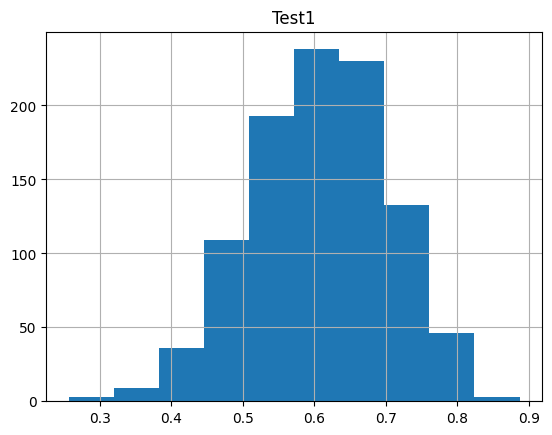

In [21]:
df.hist(column='Test1');

array([[<Axes: title={'center': '0'}>]], dtype=object)

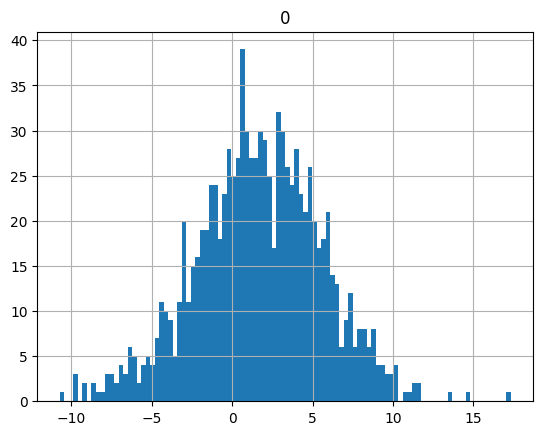

In [29]:
# гистограмма нормального распределения для генерирующегося налету датафрейма
np.random.seed(1)
pd.DataFrame(np.random.normal(1.5, 4, size=1000)).hist(bins=100)

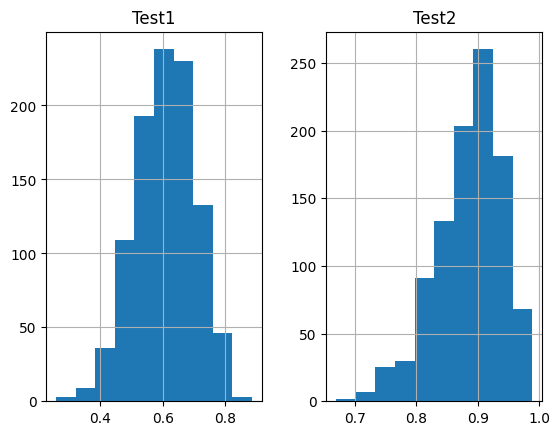

In [22]:
df.hist(column=['Test1','Test2']);

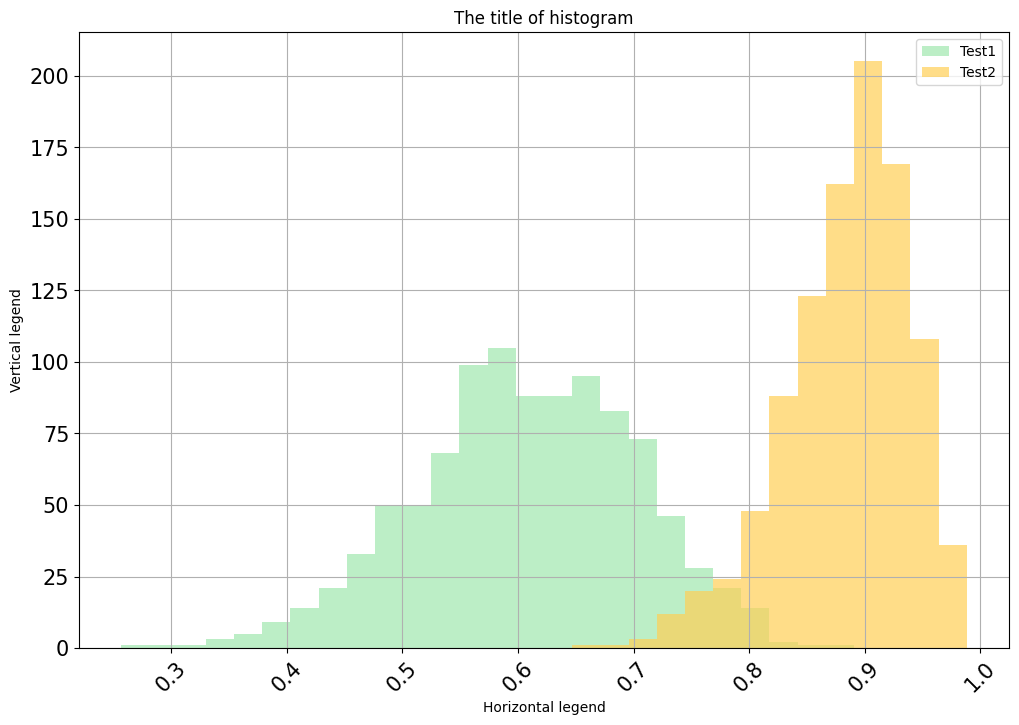

In [23]:
df.plot(kind='hist',
        alpha=0.7,
        bins=30,
        title='The title of histogram',
        rot=45,
        grid=True,
        figsize=(12,8),
        fontsize=15, 
        color=['#A0E8AF', '#FFCF56'])
plt.xlabel('Horizontal legend')
plt.ylabel("Vertical legend");

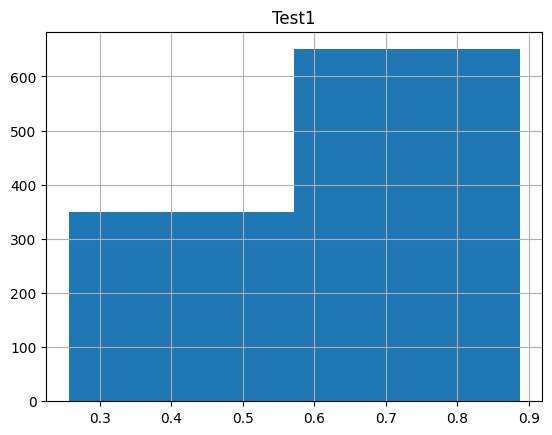

In [24]:
# диаграмма разбитая на 2 элемента
df.hist(column='Test1', bins=2);

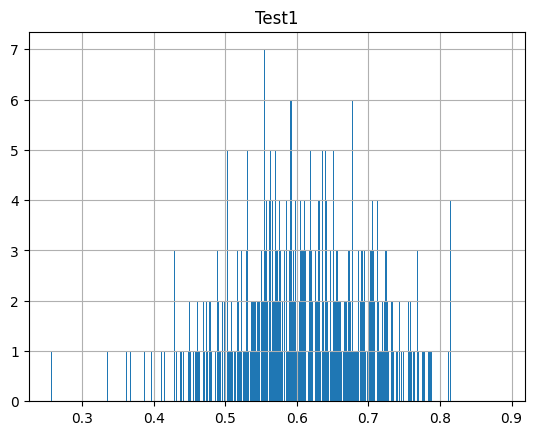

In [5]:
# диаграмма разбитая на 1000 элементов
df.hist(column='Test1', bins=1000);

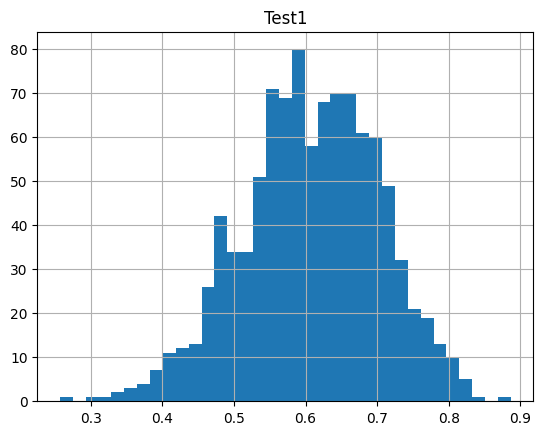

In [6]:
df.hist(column='Test1', bins=35);

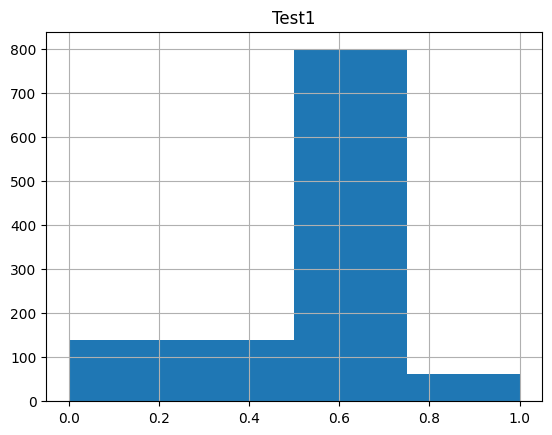

In [14]:
# гистограма разбитая на указанные в процентах участки
df.hist(column='Test1', bins=[0,.5,.75,1]);

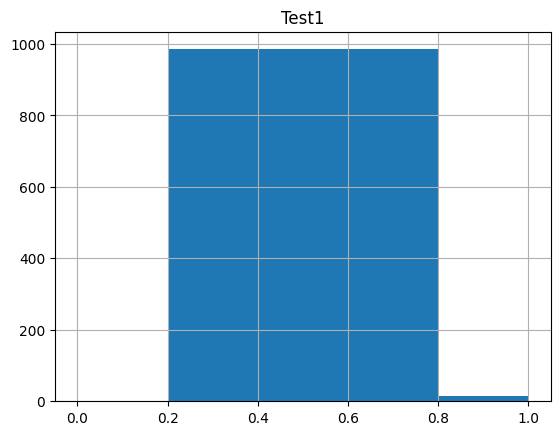

In [16]:
df.hist(column='Test1', bins=[0,0.2,.8,1]);

array([<Axes: title={'center': 'English'}>,
       <Axes: title={'center': 'Math'}>], dtype=object)

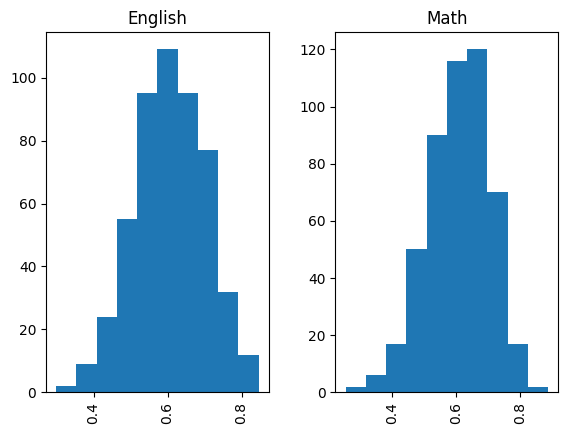

In [25]:
df.hist(column='Test1', by='Major')

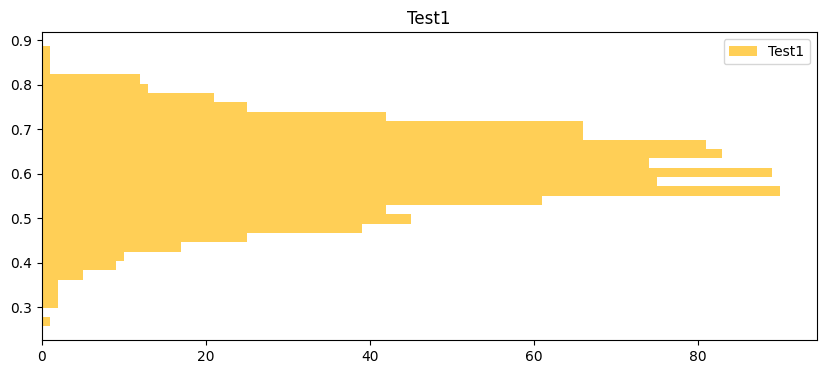

In [29]:
df.hist(column='Test1',
        grid=False,
        figsize=(10, 4),
        legend=True,
        bins=30,
        orientation='horizontal',
        color='#FFCF56');

In [ ]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

# Hot Key


* CTRL SHIFT P - показать палитру команд;

* CTRL M A - вставить кодовую ячейку выше;
* CTRL M B - вставить кодовую ячейку ниже;
* CTRL M D - удалить ячейку;
* CTRL M -  - разбить ячейку;
* CTRL V - вставить скопированную ячейку;
* CTRL F8 - выполнить все ячейки выше;
* CTRL F9 - выполнить все ячейки;
* CTRL F10 - выполнить ячейки от текущей и ниже;
* CTRL M . - перезапустить kernel;
* CTRL M H - показать сочетания клавиш;
* Z - отмена последней манипуляции с ячейками (надо выйти из режима редактирования ячейки посредством нажатия ESC);
* CTRL M M - преобразовать в текстовую ячейку;
* CTRL M Y - преобразовать в кодовую ячейку;
* CTRL ENTER - исполнить активную ячейку;
* SHIFT ENTER - исполнить активную ячейку с перемещением курсора на следующую. 
Еще полезные команды, для которых сочетание потребуется задать самому (CTRL M H):
* CTRL SHIFT U - объединить выделенную ячейку с предыдущей (курсор в активной ячейке);
* CTRL SHIFT D - объединить сфокусированную ячейку со следующей;
* CTRL SHIFT C - скопировать ячейку или выделенный текст;
* CTRL SHIFT X - вырезать ячейку.
